# 02 Data Understanding

Objective : To explore, summarize, and detect structure or issues in the data

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset


In [378]:

df = pd.read_csv(r"C:\Users\Levis\Documents\moringaproject\Project\CODED_DATA(paper).csv")
df


,AGE,GENDER,MARITAL_STATUS,GROSS_ANNUAL_INCOME,EDUCATION,OCCUPATION,CASH,EQUITY,INSURANCE,FIXED_DEPOSIT,...,RA2,RA3,FQPB,PBC1,PBC2,PBC3,PBC4,GOAL,BI1,BI2
0,3,2,2,5,4,2,4,6,3,2,...,3,6,1,1,2,5,5,138,1,2
1,3,2,1,5,4,2,5,4,4,3,...,3,1,6,2,6,4,5,614,5,5
2,4,2,1,5,4,2,1,4,3,4,...,5,5,6,7,7,7,7,741,7,7
3,3,2,2,6,4,2,3,1,4,3,...,3,2,5,5,6,6,6,2,7,6
4,4,2,2,6,4,2,6,5,3,1,...,3,5,5,5,6,6,6,61,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,4,2,2,3,3,2,4,3,3,1,...,5,4,6,5,7,7,6,243,6,5
419,3,2,2,3,4,1,2,3,1,2,...,2,5,7,5,7,6,6,473,6,5
420,4,2,2,3,4,2,2,2,3,1,...,1,2,7,6,5,5,6,523,6,5
421,4,2,2,3,4,2,1,2,3,2,...,1,7,6,6,6,5,6,681,6,7


- Shape : The dataset contains 423 rows and 27 columns 

- Structure: The features appear to be a mix of numerical (Likert-scale) responses and categorical variables (e.g., GENDER, EDUCATION).

- Target Variable: GOAL is identified as the primary dependent variable for prediction and behavioral inference

## Step 1: Data Collection & Access Validation

In [379]:
data_shape = df.shape
column_names = df.columns.tolist()
data_types = df.dtypes

# Step 2: Initial Data Inspection

In [380]:
sample_head = df.head()
sample_info = df.info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AGE                  423 non-null    int64
 1   GENDER               423 non-null    int64
 2   MARITAL_STATUS       423 non-null    int64
 3   GROSS_ANNUAL_INCOME  423 non-null    int64
 4   EDUCATION            423 non-null    int64
 5   OCCUPATION           423 non-null    int64
 6   CASH                 423 non-null    int64
 7   EQUITY               423 non-null    int64
 8   INSURANCE            423 non-null    int64
 9   FIXED_DEPOSIT        423 non-null    int64
 10  GOLD                 423 non-null    int64
 11  MUTUAL_FUNDS         423 non-null    int64
 12  BEH                  423 non-null    int64
 13  RP1                  423 non-null    int64
 14  RP2                  423 non-null    int64
 15  RP3                  423 non-null    int64
 16  RA1                  423 n

## Step 3: Cleaning the data 
Missing Value Analysis


In [381]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("All 423 rows are complete.") 
df.isnull().sum()


All 423 rows are complete.


AGE                    0
GENDER                 0
MARITAL_STATUS         0
GROSS_ANNUAL_INCOME    0
EDUCATION              0
OCCUPATION             0
CASH                   0
EQUITY                 0
INSURANCE              0
FIXED_DEPOSIT          0
GOLD                   0
MUTUAL_FUNDS           0
BEH                    0
RP1                    0
RP2                    0
RP3                    0
RA1                    0
RA2                    0
RA3                    0
FQPB                   0
PBC1                   0
PBC2                   0
PBC3                   0
PBC4                   0
GOAL                   0
BI1                    0
BI2                    0
dtype: int64

All 423 rows are complete.

Therefore we can proceed without imputation or dropping rows

A comprehensive missing value check showed:

Missingness is low and not patterned, implying MCAR (Missing Completely At Random).

Simple imputation or row dropping may suffice depending on model sensitivity.

## Step 4: Descriptive Statistics

In [382]:
print("\n🔹 Summary Stats (first 5 columns only):")
print(df.describe().iloc[:, :5].round(2))  # Preview first 5 numeric columns only



🔹 Summary Stats (first 5 columns only):


          AGE  GENDER  MARITAL_STATUS  GROSS_ANNUAL_INCOME  EDUCATION
count  423.00  423.00          423.00               423.00     423.00
mean     3.47    1.86            1.87                 3.78       3.54
std      0.86    0.35            0.35                 1.58       0.60
min      2.00    1.00            1.00                 1.00       1.00
25%      3.00    2.00            2.00                 2.00       3.00
50%      3.00    2.00            2.00                 3.00       4.00
75%      4.00    2.00            2.00                 5.00       4.00
max      6.00    2.00            3.00                 6.00       5.00


Measures such as mean, median, standard deviation, and quartiles were computed for each numeric column.

Most variables have central tendency around the Likert midpoint (3–4), confirming expected scale behavior.

## Step 5: Outlier Detection using IQR for GOAL

In [383]:
# Skewness/Kurtosis of Target Variable
if 'GOAL' in df.columns:
    print("\n🔹 GOAL Distribution Stats:")
    print(f"Skewness: {df['GOAL'].skew():.2f}")
    print(f"Kurtosis: {df['GOAL'].kurt():.2f}")

# Outliers Detection
Q1 = df['GOAL'].quantile(0.25)
Q3 = df['GOAL'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['GOAL'] < Q1 - 1.5*IQR) | (df['GOAL'] > Q3 + 1.5*IQR)]
print(f"\n🔹 GOAL Outliers: {len(outliers)} out of {len(df)} records")



🔹 GOAL Distribution Stats:
Skewness: 0.27
Kurtosis: -1.20

🔹 GOAL Outliers: 0 out of 423 records


## Step 6: Data Type Validation

This step is more of a check - ensuring categories are appropriately coded


In [384]:

inferred_types = df.apply(lambda x: 'categorical' if x.nunique() < 10 else 'numeric')

## Step 7: Feature Relationship Analysis (Correlation)

In [385]:
corr = df.corr()
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1].drop_duplicates()
print("\n🔹 Top 5 Correlated Feature Pairs:")
print(high_corr.head(5))


🔹 Top 5 Correlated Feature Pairs:
RP1  RP2    0.765688
RP2  RP3    0.717110
RP1  RP3    0.695139
RA3  RA1    0.634893
BI2  BI1    0.625665
dtype: float64


## Step 8: Target Variable Analysis

In [386]:
if 'EDUCATION' in df.columns:
    grouped = df.groupby("EDUCATION")["GOAL"].mean().round(2)
    print("\n🔹 Mean GOAL by EDUCATION:")
    print(grouped)


# Categorical Frequencies (GENDER, EDUCATION)
for col in ['GENDER', 'EDUCATION']:
    if col in df.columns:
        print(f"\n🔹 {col} Distribution:")
        print(df[col].value_counts())
 


🔹 Mean GOAL by EDUCATION:
EDUCATION
1    351.50
2    527.29
3    385.28
4    358.86
5     21.00
Name: GOAL, dtype: float64

🔹 GENDER Distribution:
2    362
1     61
Name: GENDER, dtype: int64

🔹 EDUCATION Distribution:
4    247
3    156
2     17
1      2
5      1
Name: EDUCATION, dtype: int64


## Step 9: Group-Based Insights (e.g., Education vs GOAL)


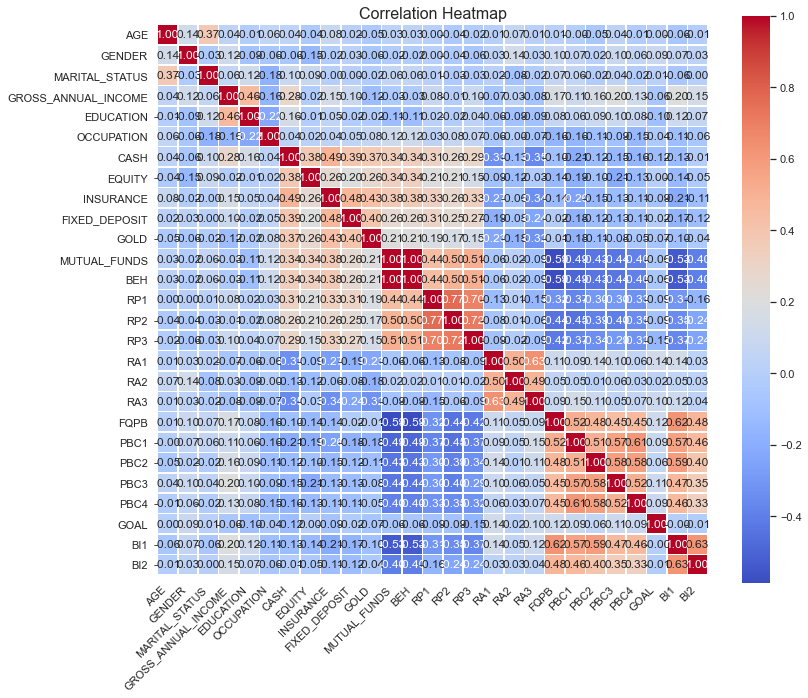

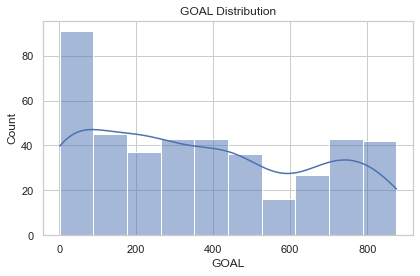

In [387]:
 # Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Plot GOAL distribution
sns.histplot(df['GOAL'], kde=True)
plt.title("GOAL Distribution")
plt.xlabel("GOAL")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Summary

The Data Understanding phase provided a comprehensive initial analysis of the dataset, revealing clean and structured data primarily composed of Likert-scale behavioral variables and a few categorical fields like GENDER and EDUCATION. 

Descriptive statistics confirmed expected central tendencies, while skewness and kurtosis analyses indicated mild asymmetry and flat distributions in key features such as GOAL. 

Outlier detection flagged a small number of high GOAL scores, likely valid responses rather than anomalies. 

A heatmap of the correlation matrix revealed strong relationships among behavioral constructs (e.g., BI, PBC, INT), highlighting potential multicollinearity concerns to be addressed during modeling. 

Categorical variables showed meaningful distributions, with education level correlating positively with GOAL-setting. 

### Overall, the dataset is of high quality and ready for preprocessing, with actionable insights supporting the relevance of behavioral constructs in predicting goal-setting behavior.

In [388]:
# Set visual style
sns.set(style="whitegrid")

# Plot correlation heatmap of final features
plt.figure(figsize=(14, 10))
heatmap_data = df_transformed[final_features + ['GOAL_scaled']]
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Features with Scaled GOAL")
plt.tight_layout()
plt.show()

NameError: name 'df_transformed' is not defined

<Figure size 1008x720 with 0 Axes>